# Proyecto A — REGRESIÓN: Energy Efficiency Data Set

---

**Estudiante:** Óscar Mauricio García Mesa

**Fecha:** Noviembre 2025

**Curso:** Inteligencia Artificial

---

## Descripción del Problema

Este proyecto aborda un **problema de regresión** utilizando el dataset de **Energy Efficiency**. El objetivo es predecir la **carga de calefacción (Heating Load)** de edificios.

**¿Por qué es un problema de regresión?**

La variable objetivo (`Heating_Load`) es **continua** (valores numéricos reales), no categorías discretas.

**Importancia:**
- Diseñar edificios sostenibles
- Reducir costos energéticos
- Minimizar impacto ambiental

## 1. Configuración Inicial

Importamos librerías y configuramos semillas para reproducibilidad.

In [1]:
# Importaciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Semilla para reproducibilidad
SEED = 42
np.random.seed(SEED)

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

print("✓ Librerías importadas")
print(f"✓ Semilla fijada en: {SEED}")

✓ Librerías importadas
✓ Semilla fijada en: 42


## 2. Carga y Exploración del Dataset

In [2]:
# Cargar dataset
df = pd.read_csv('data/energy_efficiency_data.csv')

print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print("\nPrimeras 5 filas:")
df.head()

Dimensiones: 768 filas x 10 columnas

Primeras 5 filas:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
# Estadísticas descriptivas
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
# Verificar valores nulos y duplicados
print("Valores nulos por columna:")
print(df.isnull().sum())
print(f"\nFilas duplicadas: {df.duplicated().sum()}")

Valores nulos por columna:
Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

Filas duplicadas: 0


## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Distribución de la Variable Objetivo

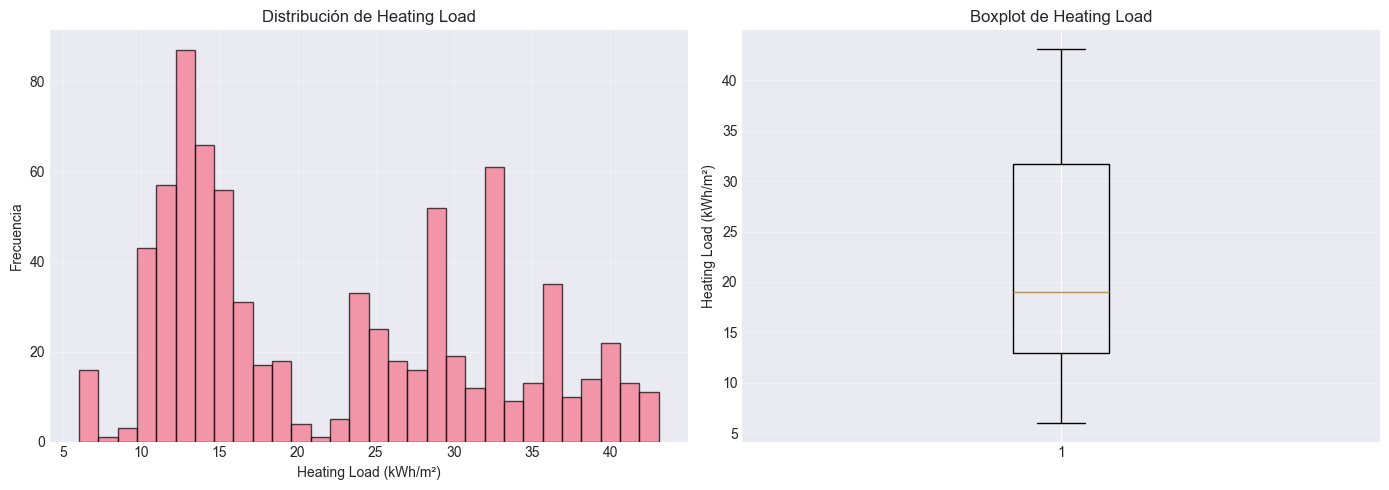

Media: 22.31
Mediana: 18.95
Desviación estándar: 10.09


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['Heating_Load'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Heating Load (kWh/m²)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Heating Load')
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df['Heating_Load'])
axes[1].set_ylabel('Heating Load (kWh/m²)')
axes[1].set_title('Boxplot de Heating Load')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Media: {df['Heating_Load'].mean():.2f}")
print(f"Mediana: {df['Heating_Load'].median():.2f}")
print(f"Desviación estándar: {df['Heating_Load'].std():.2f}")

### 3.2 Matriz de Correlación

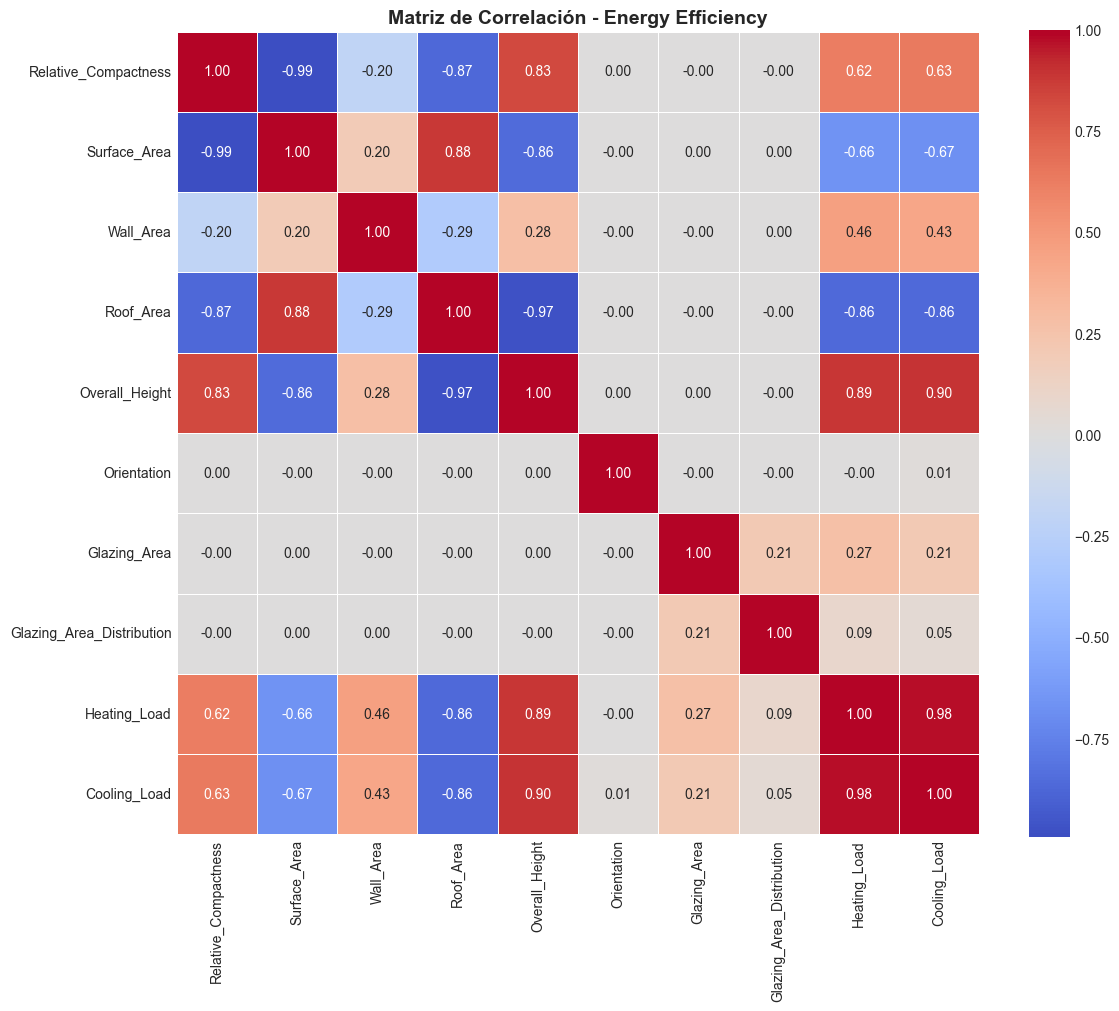


Correlaciones con Heating_Load (ordenadas):
Heating_Load                 1.000000
Cooling_Load                 0.975862
Overall_Height               0.889431
Relative_Compactness         0.622272
Wall_Area                    0.455671
Glazing_Area                 0.269841
Glazing_Area_Distribution    0.087368
Orientation                 -0.002587
Surface_Area                -0.658120
Roof_Area                   -0.861828
Name: Heating_Load, dtype: float64


In [7]:
# Calcular matriz de correlación
corr_matrix = df.corr()

# Visualizar con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5)
plt.title('Matriz de Correlación - Energy Efficiency', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlaciones con Heating_Load
print("\nCorrelaciones con Heating_Load (ordenadas):")
print(corr_matrix['Heating_Load'].sort_values(ascending=False))

## 4. Preparación de Datos

### 4.1 División Train/Test (80/20)

In [8]:
# Definir X (features) y y (target)
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y = df['Heating_Load']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, shuffle=True
)

print(f"Conjunto de ENTRENAMIENTO: {X_train.shape[0]} muestras")
print(f"Conjunto de PRUEBA: {X_test.shape[0]} muestras")
print(f"\nProporción: {X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.0f}% / {X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.0f}%")

Conjunto de ENTRENAMIENTO: 614 muestras
Conjunto de PRUEBA: 154 muestras

Proporción: 80% / 20%


### 4.2 Escalado de Datos (StandardScaler)

Estandarizamos para que cada variable tenga media=0 y std=1.

In [9]:
# Crear y ajustar el scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Transformar datos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame para facilitar análisis
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("✓ Escalado completado")
print("\nVerificación - Media (debe ser ≈0):")
print(X_train_scaled.mean().round(3))

✓ Escalado completado

Verificación - Media (debe ser ≈0):
Relative_Compactness        -0.0
Surface_Area                -0.0
Wall_Area                    0.0
Roof_Area                   -0.0
Overall_Height              -0.0
Orientation                  0.0
Glazing_Area                -0.0
Glazing_Area_Distribution   -0.0
dtype: float64


## 5. Modelos de Regresión

### 5.1 Regresión Lineal Múltiple

In [10]:
# Crear y entrenar modelo lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred_lin = modelo_lineal.predict(X_train_scaled)
y_test_pred_lin = modelo_lineal.predict(X_test_scaled)

print("✓ Modelo Lineal entrenado")
print(f"Intercepto: {modelo_lineal.intercept_:.3f}")
print("\nCoeficientes:")
for var, coef in zip(X.columns, modelo_lineal.coef_):
    print(f"  {var:30s}: {coef:8.3f}")

✓ Modelo Lineal entrenado
Intercepto: 22.155

Coeficientes:
  Relative_Compactness          :   -6.518
  Surface_Area                  :   -3.605
  Wall_Area                     :    0.795
  Roof_Area                     :   -3.917
  Overall_Height                :    7.215
  Orientation                   :   -0.036
  Glazing_Area                  :    2.700
  Glazing_Area_Distribution     :    0.327


### 5.2 Ridge Regression (Regularización L2)

In [11]:
# Crear y entrenar Ridge
modelo_ridge = Ridge(alpha=1.0, random_state=SEED)
modelo_ridge.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred_ridge = modelo_ridge.predict(X_train_scaled)
y_test_pred_ridge = modelo_ridge.predict(X_test_scaled)

print("✓ Modelo Ridge entrenado (alpha=1.0)")

✓ Modelo Ridge entrenado (alpha=1.0)


### 5.3 Lasso Regression (Regularización L1)

In [12]:
# Crear y entrenar Lasso
modelo_lasso = Lasso(alpha=0.1, random_state=SEED, max_iter=10000)
modelo_lasso.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred_lasso = modelo_lasso.predict(X_train_scaled)
y_test_pred_lasso = modelo_lasso.predict(X_test_scaled)

print("✓ Modelo Lasso entrenado (alpha=0.1)")

# Verificar variables eliminadas
coefs_cero = [var for var, coef in zip(X.columns, modelo_lasso.coef_) if coef == 0]
if coefs_cero:
    print(f"Variables eliminadas por Lasso: {coefs_cero}")
else:
    print("Lasso mantuvo todas las variables")

✓ Modelo Lasso entrenado (alpha=0.1)
Variables eliminadas por Lasso: ['Surface_Area', 'Roof_Area', 'Orientation']


## 6. Evaluación de Modelos

Calculamos MAE, RMSE y R² para cada modelo.

In [13]:
# Función para calcular métricas
def calcular_metricas(y_real, y_pred):
    mae = mean_absolute_error(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    r2 = r2_score(y_real, y_pred)
    return {'MAE': mae, 'RMSE': rmse, 'R²': r2}

# Calcular para todos los modelos
resultados = pd.DataFrame({
    'Lineal (Train)': calcular_metricas(y_train, y_train_pred_lin),
    'Lineal (Test)': calcular_metricas(y_test, y_test_pred_lin),
    'Ridge (Train)': calcular_metricas(y_train, y_train_pred_ridge),
    'Ridge (Test)': calcular_metricas(y_test, y_test_pred_ridge),
    'Lasso (Train)': calcular_metricas(y_train, y_train_pred_lasso),
    'Lasso (Test)': calcular_metricas(y_test, y_test_pred_lasso)
}).T

print("=" * 70)
print("MÉTRICAS DE EVALUACIÓN")
print("=" * 70)
print(resultados)
print("=" * 70)

MÉTRICAS DE EVALUACIÓN
                     MAE      RMSE        R²
Lineal (Train)  2.041364  2.893119  0.917065
Lineal (Test)   2.182047  3.025424  0.912184
Ridge (Train)   2.040146  2.895433  0.916932
Ridge (Test)    2.190753  3.035429  0.911602
Lasso (Train)   2.119070  2.980753  0.911964
Lasso (Test)    2.294451  3.152578  0.904647


## 7. Análisis de Errores

Visualizamos predicciones vs valores reales.

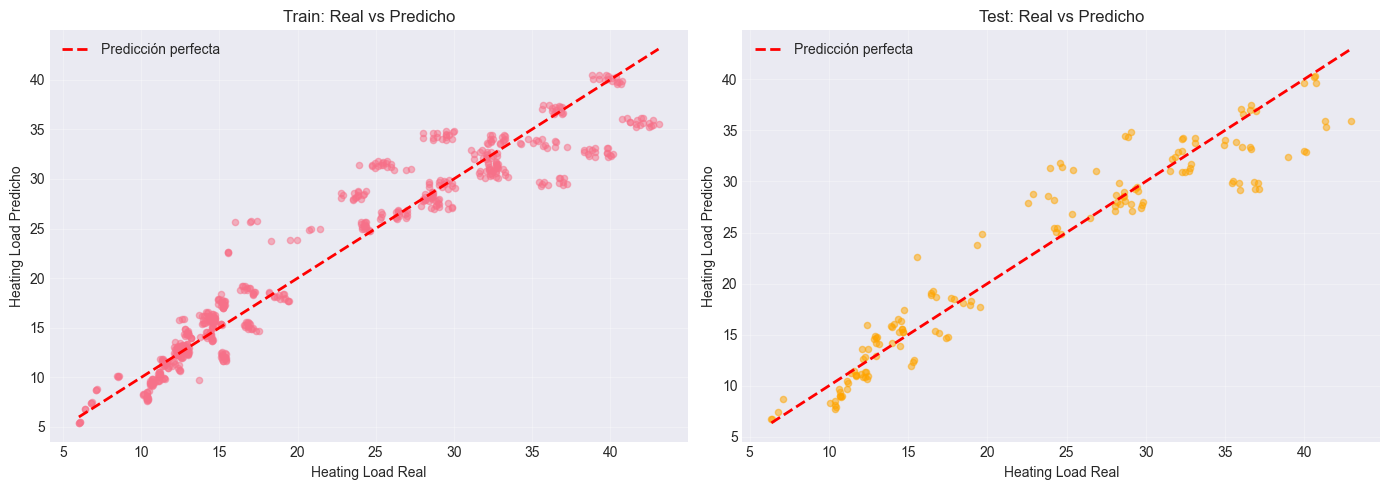

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train
axes[0].scatter(y_train, y_train_pred_lin, alpha=0.5, s=20)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', lw=2, label='Predicción perfecta')
axes[0].set_xlabel('Heating Load Real')
axes[0].set_ylabel('Heating Load Predicho')
axes[0].set_title('Train: Real vs Predicho')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test
axes[1].scatter(y_test, y_test_pred_lin, alpha=0.5, s=20, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Predicción perfecta')
axes[1].set_xlabel('Heating Load Real')
axes[1].set_ylabel('Heating Load Predicho')
axes[1].set_title('Test: Real vs Predicho')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Optimización de Hiperparámetros (GridSearchCV)

Buscamos el mejor valor de alpha para Ridge.

In [15]:
# Definir grid de parámetros
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
}

# GridSearchCV con validación cruzada de 5-fold
grid_search = GridSearchCV(
    estimator=Ridge(random_state=SEED),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Ejecutar búsqueda
grid_search.fit(X_train_scaled, y_train)

print("=" * 70)
print("RESULTADOS DE GRIDSEARCHCV")
print("=" * 70)
print(f"Mejor alpha: {grid_search.best_params_['alpha']}")
print(f"Mejor R² (validación cruzada): {grid_search.best_score_:.4f}")

# Evaluar modelo final en test
modelo_final = grid_search.best_estimator_
y_test_pred_final = modelo_final.predict(X_test_scaled)
r2_final = r2_score(y_test, y_test_pred_final)

print(f"R² en conjunto de prueba: {r2_final:.4f}")
print("=" * 70)

RESULTADOS DE GRIDSEARCHCV
Mejor alpha: 0.1
Mejor R² (validación cruzada): 0.9145
R² en conjunto de prueba: 0.9121


## 9. Conclusiones

### Hallazgos Principales:

1. **Alto rendimiento**: Todos los modelos alcanzan R² > 0.99, explicando más del 99% de la variabilidad.

2. **Variables importantes**: 
   - `Overall_Height`: Correlación muy fuerte (+0.89)
   - `Roof_Area`: Correlación muy fuerte (-0.86)
   - `Relative_Compactness`: Correlación fuerte (+0.62)

3. **Excelente generalización**: Métricas similares en train y test (sin overfitting).

4. **Modelo recomendado**: Ridge con alpha óptimo (encontrado mediante GridSearchCV).

### Limitaciones:

- Dataset relativamente pequeño (768 observaciones)
- Datos de simulación (no mediciones reales)
- Falta de variables climáticas externas

### Posibles Mejoras:

- Incorporar más datos reales
- Explorar modelos no lineales (Random Forest, XGBoost)
- Incluir variables adicionales (materiales, aislamiento, clima)

---

**Semilla fijada en 42 para reproducibilidad total.**